## Abalone Dataset

### Data set description

The dataset used is Abalone Data set. This dataset is from UCI Machine Learning Repository. The source of the data is from original study in this link https://archive.ics.uci.edu/ml/datasets/Abalone. [Accessed 04 January 2020].

In this task with the dataset, the age of the abalone should be predicted with the physical measurements. In general, the age is determined by cutting the shell through the cone, staining after that, and counting the number of rings present through the microscope. 

This dataset has 4177 instances. There are no missing values in this data set as per the description given. The missing values are already removed from the original samples and the ranges of continuous values are scaled with ANN. 


## Attributes
There are 9 attributes. These attributes are the columns of the data set. The age column is not included in the dataset. But in the description it is given that age = Rings + 1.5.

1.	Sex – The  data type is categorical and there are three types in this data. M, F and I. 
2.	Length – It is the continuous datatype and the units are in mm. It is the longest shell measurement. 
3.	Diameter – It is also continuous datatype and the units are in mm. It is the perpendicular to length. 
4.	Height – It is a continuous data type. It is numerical just like diameter and length. Its units are in mm and it is the meat in the shell. 
5.	Whole weight – A continuous data measured in grams. It is the weight of whole abalone. 
6.	Shucked weight – It is same as whole weight, continuous data, measured in grams and it is the weight of the meat. 
7.	Viscera weight – It is also continuous data, measured in grams and it is the git weight after bleeding. 
8.	Shell weight – It is the weight of the shell after being dried. It is continuously varying data. 
9.	Rings – It is an integer and adding 1.5 to rings gives the age of the abalone. 


## Data pre-processing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#%% import the dataset (Ablone dataset)

df = pd.read_csv('abalone.csv')

## Data Pre-processing

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The minimum value in height is zero. There are some zero values in height feature so checking the 'height' feature. 

In [7]:
df['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [8]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are only two rows with zero values. We can remove these two rows from our dataset and consider the rest of the data for the model. 

In [9]:
df1 = df[df.Height != 0]
df1.describe()
df1['Height'].describe()

count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

### Checking the correlation

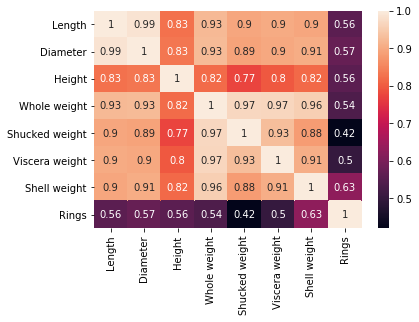

In [12]:

df1.corr()
#plotting the correlation
plt.figure(1)
sns.heatmap(df.corr(), annot = True)

### Checking for missing values


It is clearly seen that there are no null values in the dataset. Even though it is already described in the dataset description, it is always best to check for null values. Because, sometimes the null values are formed with some row and columns operation done during pre-processing due to the user naivety.

In [13]:
#checking for missing values
df1.isna().sum() 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4175 non-null object
Length            4175 non-null float64
Diameter          4175 non-null float64
Height            4175 non-null float64
Whole weight      4175 non-null float64
Shucked weight    4175 non-null float64
Viscera weight    4175 non-null float64
Shell weight      4175 non-null float64
Rings             4175 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


From the info printed above, it is evident that there is only one categorical data (Sex) and there are 7 float64 columns and one integer columns. The data description provided earlier is correctly represented in this info. 

## Data visualization

<Figure size 864x720 with 0 Axes>

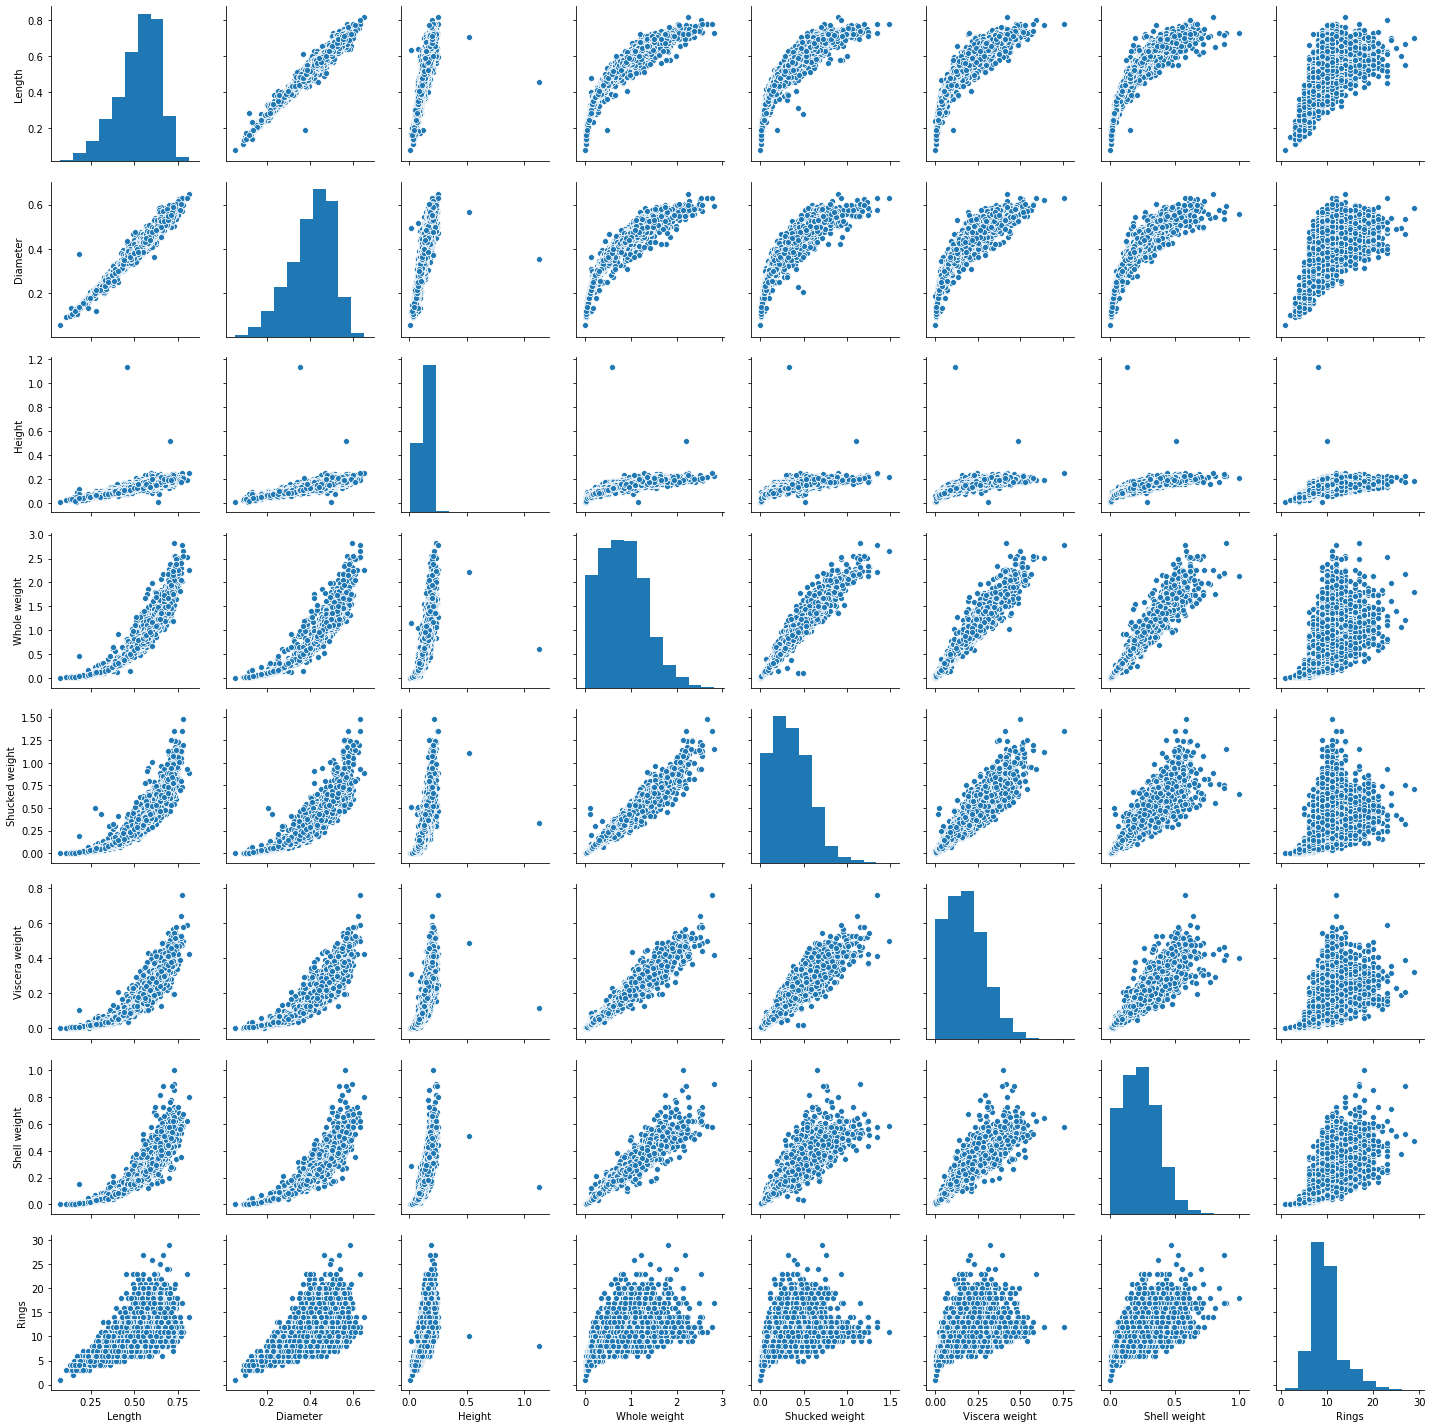

In [15]:
#plotting a pair plot to check
plt.figure(2, figsize = (12, 10))
sns.pairplot(df1)

This plot is generally built in two plots basically, histograms and scatter plot. This gives us valuable insights in the data. This plot can alone serve for full analysis of the data. This pair plot is more informative than the other kind of plots. The plot is shown below. 



From the information given by the df.info(), there is one categorical variable(sex). A count plot is plotted to see how the categories are distributed on all the samples. 

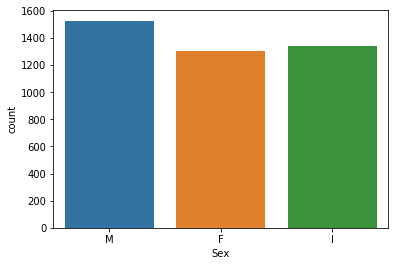

In [17]:
#we have one categorical variable. ('Sex')
#plotting to check how many categories for 'Sex' variable
sns.countplot(df1.Sex)

The above plot infers that the males dominate the other categories. This feature is explored more considering Rings feature. 

<Figure size 864x720 with 0 Axes>

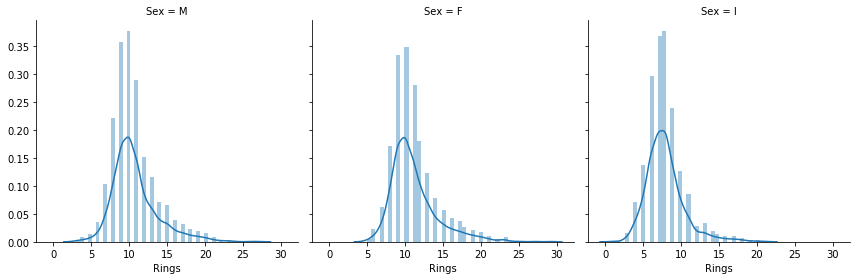

In [18]:
#exploring the sex columns more
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df1, col= 'Sex', height = 4)
g.map(sns.distplot, 'Rings')

## Label Encoding


In [19]:
# dummy columns are created for the categories in Sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1.Sex)
 #the dummy columns are included in df now

As mentioned in the description, the age column can be formed by adding number 1.5 to rings feature. This is done and added into the main data frame because, the task is to predict the age. A count plot is drawn to visualize the age distribution on the data. 

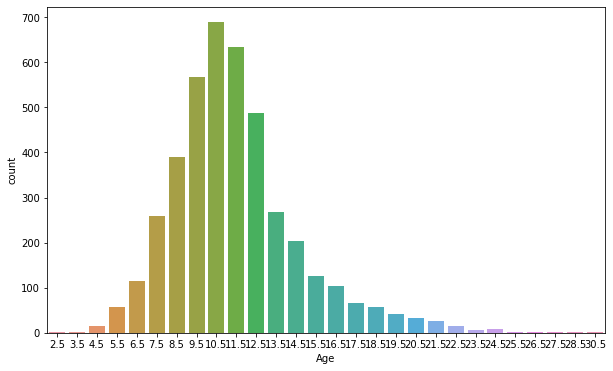

In [20]:
#as per description age = number of rings + 1.5
df1['Age'] = df1.Rings + 1.5
df1['Age'].describe()
#lets check the age plot
plt.figure(4, figsize=(10, 6))
sns.countplot(df1['Age'])


The plot says that the age group of 7.5 and 15 has the greatest number of samples. The age feature is divided into two classed. 0 is considered as young and if age is less than 8. 1 is considered old and if age is greater than 8.

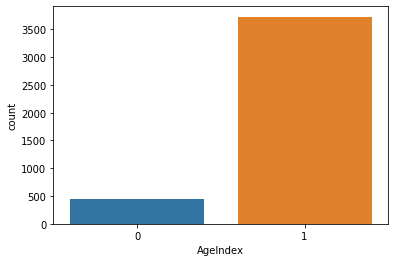

In [21]:
AgeValues = df1['Age'].values
AgeIndex = []
# 0 is young, 1 is old
for age in AgeValues:
    if age <8:
        AgeIndex.append('0')
    else:
        AgeIndex.append('1')

AgeIndex = pd.DataFrame(data = AgeIndex, columns = ['AgeIndex'])
df1.reset_index(drop=True, inplace=True)
AgeIndex.reset_index(drop = True, inplace = True)
newDf = pd.concat([df1, AgeIndex], axis = 1)

plt.figure(5)
sns.countplot(newDf['AgeIndex'])

The age for each sample plotted and it is clearly seen that there are too many old samples than young. This old and young samples can be changed according to out preference. 

The age classes are dropped from the data, to make it ready for prediction. After dropping the data is standardised using sklearn preprocessing library StandardScaler. The data is then fit and transformed and stored in variable X. This data is split into training and testing data with 40% of test size. This is done using another sklearn library train_test_split. 

In [22]:
newDf.drop(['AgeIndex', 'Sex'], axis = 1, inplace = True)
y = AgeIndex.values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(newDf)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size=0.4)


## Classification Model


The classification model used here is Support Vector Machine. The SVM Classifier algorithm finds a hyperplane in n dimensional space(n is number of features) which classify the data points distinctly. 

In [38]:
from sklearn.svm import SVC
svcModel = SVC()
svcModel.fit(X_train, y_train)

y_pred = svcModel.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix
accuracyScore = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score: {accuracyScore}')
print(f'Confusion Matrix: \n{confusionMatrix}')

Accuracy Score: 0.9988023952095808
Confusion Matrix: 
[[ 169    2]
 [   0 1499]]


The parameters used for this model may not be the best paramets and the score obtained may not be best scored obtained. So, parameters must be tuned to get best output from the model. GridSearchCV technique is one of the parameters tuning technique

In [39]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svcClf = GridSearchCV(svcModel, param_grid = params, scoring = 'accuracy', cv = 10)
svcClf.fit(X_train, y_train)
#
# best parameters and also the best score
print("Tuned Linear Regression Parameters: {}".format(svcClf.best_params_))
print("Best score is {}".format(svcClf.best_score_))


Tuned Linear Regression Parameters: {'C': 10, 'gamma': 0.01}
Best score is 1.0


After applying grid search, the model has been tuned and produced best results. The best parameters for model with this dataset are C = 10 and gamma = 0.01. The best accuracy score obtained from grid search is 1.0 which means model has 100% accuracy with these parameters. 

In [40]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svcModel, X, y, cv=10) 
avgScore = scores.mean()
print("The Average Accuracy Score of the model with 10k folds", avgScore)

The Average Accuracy Score of the model with 10k folds 0.9995215311004785


## Regression

Regression is also a part of classification. It models a target value based on the independent predictors. 
It is mostly used in finding out the relationship between some variables and forecasting. There are different regression models based on the kind of relationship between the targets and variables. Linear regression is one of them which is used in this regression task.


In [41]:
#%% Regression model (linear Regressor)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

regModel = LinearRegression()
regModel.fit(X_train, y_train)

y_pred_train = regModel.predict(X_train)
#evaluating model on train set
kfold = KFold(n_splits = 5)
cv_results = cross_val_score(regModel, X_train, y_train, scoring='neg_mean_squared_error', cv = kfold)

### Evaluation

In [91]:
y_pred_train = regModel.predict(X_train)
y_pred = regModel.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)

mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)
r2Score = r2_score(y_test, y_pred)
print('R2 Score', r2Score)


Mean Absolute Error 0.15154335434287156
Mean Squared Error 0.04987878183627168
R2 Score 0.45731097666210974
